## MCEq-1D

In [13]:
# https://mceq.readthedocs.io/en/latest/tutorial.html#tutorial

In [1]:
from MCEq.core import config, MCEqRun
import crflux.models as crf
import matplotlib.pyplot as plt
import numpy as np
from numba import njit
import sys

In [2]:
sys.path.append('C:\\Users\\Bruger\\AppStat2021\\External_Functions')
import Clotilde_external_functions as cef
import ExternalFunctions as ef

In [3]:
import mplcyberpunk as mcp
#plt.style.use("cyberpunk")
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
#plt.rcParams['axes.labelcolor'] = 'black'
#plt.rcParams['xtick.color'] = 'black'
#plt.rcParams['ytick.color'] = 'black'

#colors = [
    #'#08F7FE',  # teal/cyan
    #'#FE53BB',  # pink
    #'#F5D300',  # yellow
    #'#00ff41',  # matrix green
#]

In [4]:
#@njit()

def flux(theta, int_model = 'SIBYLL23C', primary_model = (crf.HillasGaisser2012, 'H3a') , numu_only = False):
    
    
    # Initalize MCEq by creating the user interface object MCEqRun
    mceq = MCEqRun(

        # Hadronic interaction model
        interaction_model= int_model,    # The default is high-energy

        # cosmic ray flux at the top of the atmosphere (primary flux)
        primary_model = primary_model,

        # zenith angle
        theta_deg = theta
    )
    
    mceq.set_theta_deg(theta*180/np.pi) # in degrees
    mceq.set_interaction_model(int_model)
    mceq.set_primary_model(primary_model[0], primary_model[1])
    
    # Solve the equation system
    mceq.solve()

    # Obtain the result
    # Multiply fluxes be E**mag to resolve the features of the steep spectrum
    mag = 0
    x = mceq.e_grid
    
    if numu_only == False:
        muon_flux = (mceq.get_solution('mu+', mag) +
                     mceq.get_solution('mu-', mag))
        numu_flux = (mceq.get_solution('numu', mag) +
                     mceq.get_solution('antinumu', mag))
        nue_flux = (mceq.get_solution('nue', mag) +
                    mceq.get_solution('antinue', mag))
        
        return muon_flux, numu_flux, nue_flux, x

    else:
        numu_flux = (mceq.get_solution('numu', mag) +
                     mceq.get_solution('antinumu', mag))
        
        
        return numu_flux, x

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): EPOSLHC
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


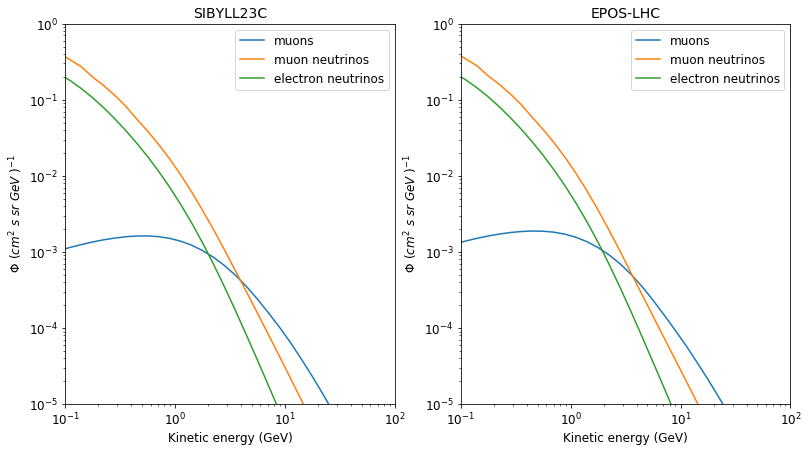

In [5]:
# Plots for 2 different interaction models
interaction_model = ['SIBYLL23C', 'EPOS-LHC']
r_theta = r'$\theta$'
r_numu = r'$\nu_{\mu}$'

fig, axs = plt.subplots(1,2, figsize=(13, 7), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(len(interaction_model)):
    muon_flux_0, numu_flux_0, nue_flux_0, x = flux(0, interaction_model[i])
    
    axs[i].loglog(x, muon_flux_0, label='muons')
    axs[i].loglog(x, numu_flux_0, label='muon neutrinos')
    axs[i].loglog(x, nue_flux_0, label='electron neutrinos')

    axs[i].set_xlim(10**(-1), 100)
    axs[i].set_xlabel('Kinetic energy (GeV)', fontsize=12)
    axs[i].set_ylim(10**(-5), 1)
    #(E/\text{GeV})^3\,\Phi$ (GeV cm$^{-2}$\,$s$^{-1}\,$sr$^{-1}$) (GeV)
    axs[i].set_ylabel(r' $\Phi$ ($cm^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
    axs[i].set_title(interaction_model[i])
    axs[i].legend(fontsize=12)
    

In [69]:
#crf.test()

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL

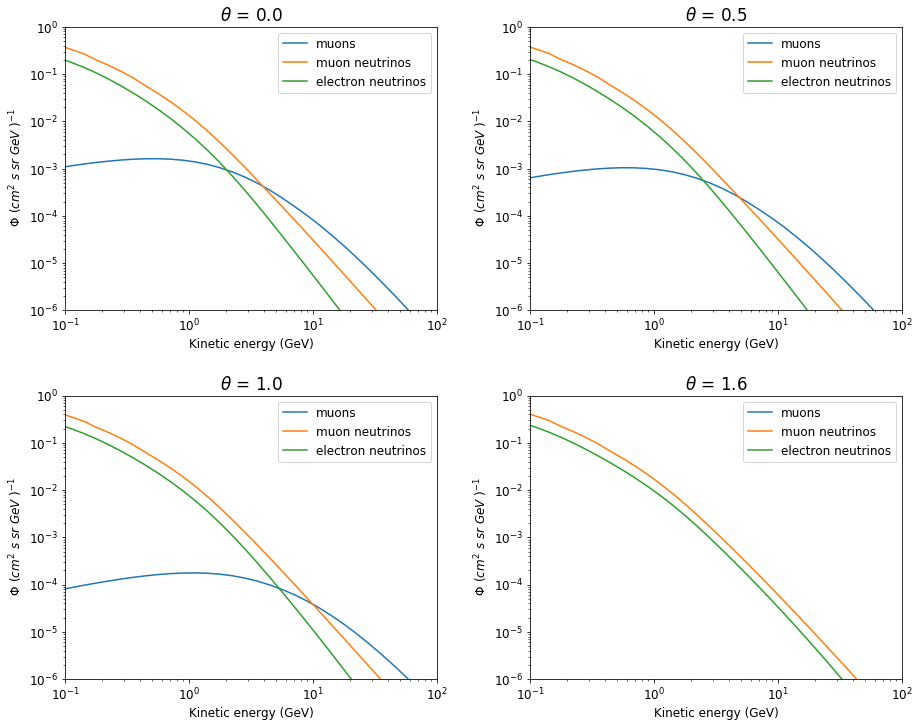

In [13]:
# Plots for 4 different theta
theta = np.linspace(0, np.pi/2, 4)

fig, axs = plt.subplots(2,2, figsize=(15, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=.25)
axs = axs.ravel()

for i in range(len(theta)):
    muon_flux, numu_flux, nue_flux, x = flux(theta[i])
    
    axs[i].loglog(x, muon_flux, label='muons')
    axs[i].loglog(x, numu_flux, label='muon neutrinos')
    axs[i].loglog(x, nue_flux, label='electron neutrinos')
    axs[i].set_xlim(0.1, 100)
    axs[i].set_ylim(1e-6, 1.)

    axs[i].set_xlabel('Kinetic energy (GeV)', fontsize=12)
    #(E/\text{GeV})^3\,\Phi$ (GeV cm$^{-2}$\,$s$^{-1}\,$sr$^{-1}$) (GeV)
    axs[i].set_ylabel(r' $\Phi$ ($cm^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
    axs[i].set_title(f'{r_theta} = {np.round(theta[i],1)}')
    axs[i].legend(fontsize=12)

#fig.savefig('3particles_4angles.png')

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


No handles with labels found to put in legend.


(0.0001, 100)

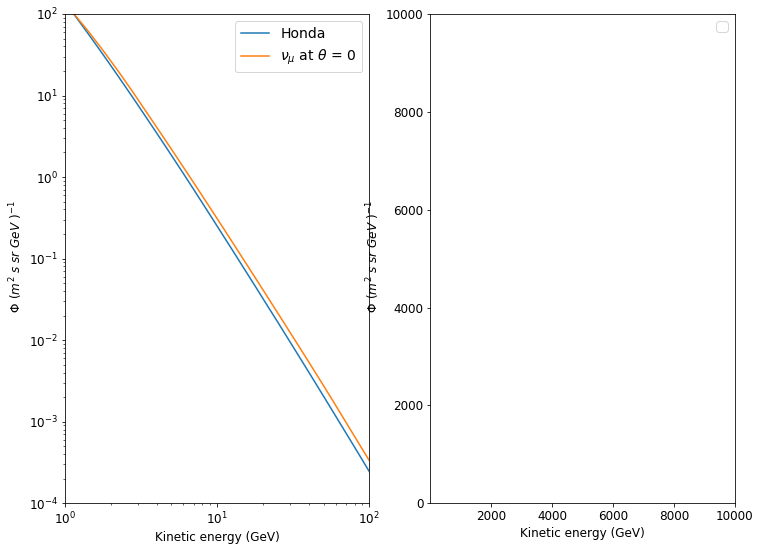

In [372]:
#theta = np.linspace(0, np.pi/2, 4)
theta = [0, np.pi/2]
fig, axs = plt.subplots(1, 2, figsize=(16,9))
axs = axs.ravel()
r_nue = r'$\nu_e$'
Honda_1dflux = np.genfromtxt('Honda_1dflux', delimiter=',')
Honda_energy = np.genfromtxt('Honda_energy', delimiter=',')
axs[0].loglog(Honda_energy, Honda_1dflux, label='Honda')

numu_flux_0, x = flux(theta[0], numu_only=True)
numu_flux_90, x = flux(theta[1], numu_only=True)

axs[0].loglog(x, numu_flux_0*10000, label=f'{r_numu} at {r_theta} = {np.round(t,1)}')  #m^2
#axs[1].loglog(x, nue_flux, label=f'{r_nue} at {r_theta} = {np.round(t,1)}')

#for t in theta:
    #muon_flux, numu_flux, nue_flux, x = flux(t)
    #axs[0].loglog(x, numu_flux*10000, label=f'{r_numu} at {r_theta} = {np.round(t,1)}')  #m^2
    #axs[1].loglog(x, nue_flux, label=f'{r_nue} at {r_theta} = {np.round(t,1)}')
    
for i in range(2):
    axs[i].set_xlabel('Kinetic energy (GeV)', fontsize=12)
    axs[i].set_ylabel(r' $\Phi$ ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
    axs[i].set_xlim(0.1, 10**4)
    axs[i].set_ylim(10**(-10), 10**4)
    axs[i].legend()
    
axs[0].set_xlim(1, 100)
axs[0].set_ylim(10**(-4), 10**(2))
#axs[0].loglog(x, Honda_1dflux/(numu_flux*10000), label='ratio')
#fig.savefig('numu_nue_4angles.png')

In [12]:
n_theta = 50
cos_theta_matrix = np.linspace(0, 1, n_theta)
cos_theta_matrix[0] += 10**(-7)
theta_matrix = np.arccos(cos_theta_matrix)

In [13]:
flux_SIBYLL23C_H3a = np.zeros((n_theta,121))

for t in range(len(theta_matrix)):
    print(t)
    numu_flux, x_matrix = flux(theta_matrix[t], numu_only = True)
    flux_SIBYLL23C_H3a[t] = numu_flux * 10_000                      # from cm^-2 to m^-2

0
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
1
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
2
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model

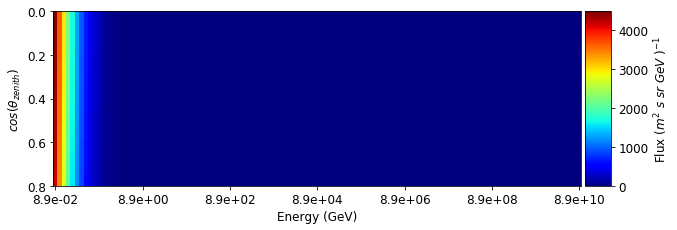

In [14]:
from matplotlib import cm, colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

energy_strings0 = [str("{:.1e}".format(x)) for x in x_matrix]
cos_theta_strings0 = [str(np.round(t, 1)) for t in cos_theta_matrix]
yticks0 = np.arange(0, 50, 10)
xticks0 = np.arange(0, 130, 20)
ylabels0 = [cos_theta_strings0[i] for i in yticks0]
xlabels0 = [energy_strings0[i] for i in xticks0]

fig, ax = plt.subplots(figsize=(10,7))

im = ax.imshow(flux_SIBYLL23C_H3a, cmap='jet', norm = None)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks0)
ax.set_xticklabels(xlabels0)
ax.set_yticks(yticks0)
ax.set_yticklabels(ylabels0)
cbar.set_label(r'Flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$')
#fig.savefig('MCEq1d...');

In [15]:
def find_nearest_above(my_array, target):
    
    diff = my_array - target
    mask = np.ma.less_equal(diff, 0)
    
    if np.all(mask):
        return None 
    masked_diff = np.ma.masked_array(diff, mask)
    
    return masked_diff.argmin()

In [16]:
# Limit to range 1-100 GeV

low_x = find_nearest_above(x_matrix, 1)
high_x =  find_nearest_above(x_matrix, 100)

energy_cropped = x_matrix[low_x : high_x]

In [17]:
np.savetxt('MCEq_energy', energy_cropped, delimiter=',')
np.savetxt('MCEq_flux90', flux_SIBYLL23C_H3a[0, low_x : high_x], delimiter=',')
np.savetxt('MCEq_flux0', flux_SIBYLL23C_H3a[-1, low_x : high_x], delimiter=',')

In [18]:
# cos intervals for binning
cos_intervals = np.round(np.arange(0, 1, 0.1), 2)
cos_bins = np.digitize(cos_theta_matrix, cos_intervals)                                
    
# energy intervals
energy_min = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,0]
energy_max = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,1]
energy_bins = np.digitize(energy_cropped, energy_min)
energy_binwidths = energy_max - energy_min

In [19]:
xticks = np.arange(-0.5, 10.5, 1)
energy_ticklabels = np.append(energy_min, energy_max[-1])
energy_strings = [f'{energy_ticklabels[i]}' for i in range(len(xticks))]

cos_values = np.round(np.arange(1, -1.1, -0.1), 2)
yticks = np.arange(-0.5, 20, 1)
ylabels = [f'{cos_values[i]}' for i in range(len(yticks))]

In [20]:
def bin_matrix(matrix, make_flux_plot = False, savefig = None):
    
    # Plot in range 1-100 GeV
    matrix_cropped = matrix[:, low_x : high_x]
    #Binning
    
    matrix_cropped_ybinned = np.zeros((len(cos_intervals) , len(matrix_cropped[0])))
    y_dim = 0
    # averaging rows in same interval
    # averaged_row = np.sum(matrix_cropped[rows[0] : rows[-1], : ], axis = 0) / len(rows) # The two methods don't give the same
    for i in range(1, len(cos_intervals)+1):
        rows = np.where(cos_bins == i)[0]
        averaged_row = np.mean(matrix_cropped[rows[0] : rows[-1], :], axis = 0)
        matrix_cropped_ybinned[ i-1 , : ] = averaged_row
    
    binned_cropped_matrix = np.zeros((len(cos_intervals), len(energy_min)))

    # averaging columns in same interval
    for i in range(1, len(energy_min)+1):
        columns = np.where(energy_bins == i)[0]
        averaged_column = np.mean(matrix_cropped_ybinned[ : , columns[0] : columns[-1]+1], axis = 1)
        binned_cropped_matrix[ : , i-1 ] = averaged_column
    
    # Assuming symmetric for negative values of cos
    binned_cropped_matrix_total = np.concatenate((np.flip(binned_cropped_matrix, axis=0), binned_cropped_matrix))
    #cropped_total = np.concatenate((np.flip(matrix_cropped, axis=0), matrix_cropped))
    ybinned_total = np.concatenate((np.flip(matrix_cropped_ybinned, axis=0), matrix_cropped_ybinned))
    
    plot_matrix = binned_cropped_matrix_total.copy()
    
    cbar_label = r'Flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$ '
        
    if make_flux_plot:
        fig, ax = plt.subplots(figsize=(10,7))

        im = ax.imshow(plot_matrix, cmap='jet')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        cbar = plt.colorbar(im, cax=cax)
        ax.set_xlabel('Energy (GeV)')
        ax.set_ylabel(r'$cos(\theta_{zenith})$')
        ax.set_xticks(xticks)
        ax.set_xticklabels(energy_strings, rotation = 45)
        ax.set_yticks(yticks)
        ax.set_yticklabels(ylabels)
        cbar.set_label(cbar_label)
        
        if savefig != None:
            fig.savefig(savefig)
        
    return plot_matrix, ybinned_total, matrix_cropped

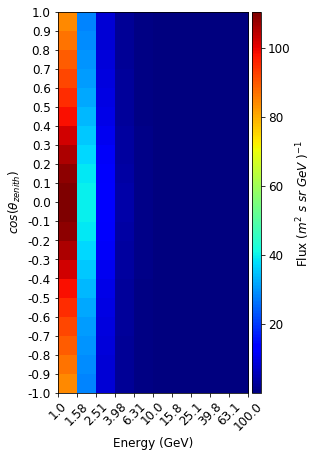

In [21]:
binned_cropped_matrix, matrix_cropped_ybinned, matrix_cropped = bin_matrix(flux_SIBYLL23C_H3a, make_flux_plot = True)
#, savefig = 'flux_SIBYLL23C_H3a')

In [22]:
np.savetxt('MCEq_cropped', matrix_cropped, delimiter=',')
np.savetxt('MCEq_ybinned', matrix_cropped_ybinned, delimiter=',')
np.savetxt('MCEq_flux_binned', binned_cropped_matrix, delimiter=',')

In [23]:
# Create a 2D histogram of the total rate of neutrinos in one year from combining
# the flux histogram and the effective area values/histogram. 

A_eff_cc = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,2]
A_eff_nc = np.genfromtxt('numu_nc.csv', skip_header = 1, delimiter =',')[:,2]

In [24]:
def rate_plot(matrix, make_plot = True, title = None, savefig = None, cbar_setlabel = None):
    # Multiplying effective area with flux
    rate_cc = matrix.copy()
    rate_nc = matrix.copy()

    for i in range(len(A_eff_cc)):
        rate_cc[:, i] *= A_eff_cc[i]
        rate_nc[:, i] *= A_eff_nc[i]
        
    # Multiply by sr
    rate_cc *= 4*np.pi/20
    rate_nc *= 4*np.pi/20

    rate_year_cc = rate_cc * 31_556_926    # seconds in a year
    rate_year_nc = rate_nc * 31_556_926
    
    # Multiply by energy binwidth
    for i in range(len(rate_year_cc[0])):
        rate_year_nc[:, i] *= energy_binwidths[i]
        rate_year_cc[:, i] *= energy_binwidths[i]
        
    cbar_label = r' Total rate of $\nu_{\mu}$ per year'
    
    if make_plot == True:
        fig, ax = plt.subplots(1, 2, figsize=(14, 9))
        ax.ravel()

        im_0 = ax[0].imshow(rate_year_cc, cmap='jet') 
        im_1 = ax[1].imshow(rate_year_nc, cmap='jet') 

        for i in range(2):
            ax[i].set_xlabel('Energy (GeV)', fontsize = 12)
            ax[i].set_ylabel(r'$cos(\theta_{zenith})$', fontsize = 12)
            ax[i].set_xticks(xticks)
            ax[i].set_xticklabels(energy_strings, rotation = 45)
            ax[i].set_yticks(yticks)
            ax[i].set_yticklabels(ylabels)

        divider_0 = make_axes_locatable(ax[0])
        divider_1 = make_axes_locatable(ax[1])
        cax_0 = divider_0.append_axes("right", size="5%", pad=0.05)
        cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
        cbar_0 = plt.colorbar(im_0, cax=cax_0)
        cbar_1 = plt.colorbar(im_1, cax=cax_1)
        cbar_0.set_label(cbar_label, fontsize = 12) 
        cbar_1.set_label(cbar_label, fontsize = 12) 
        
        if title != None:
            plt.suptitle(title, fontsize=20)

        ax[0].set_title('cc')
        ax[1].set_title('nc');
        
        if savefig != None:
            fig.savefig(savefig)
    
    return rate_year_cc, rate_year_nc

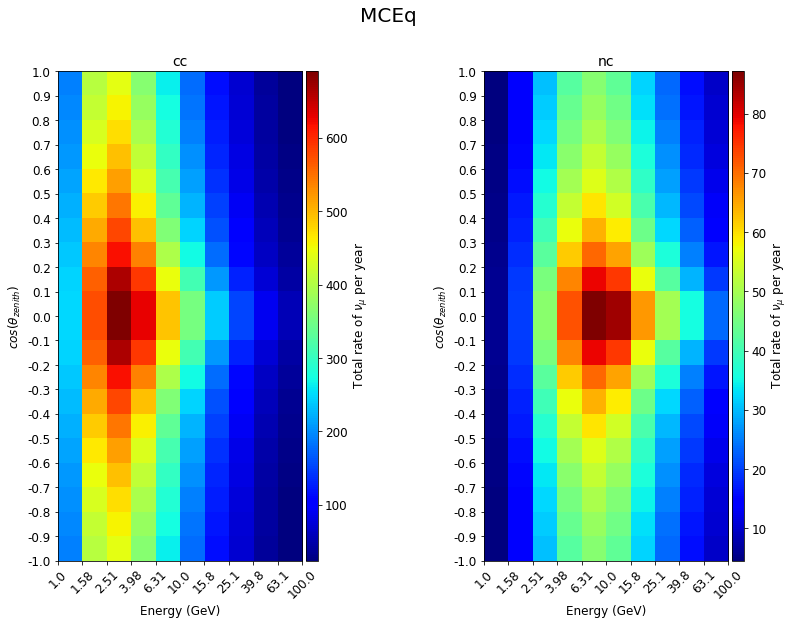

In [25]:
rate_year_cc, rate_year_nc = rate_plot(binned_cropped_matrix, title='MCEq') #, savefig = 'MCEq_1d_total_rate_per_year')


In [26]:
np.savetxt('MCEq_total_rate_year_cc' , rate_year_cc, delimiter =',')
np.savetxt('MCEq_total_rate_year_nc' , rate_year_nc, delimiter =',')

### Spline method

In [42]:
n_theta_spline = 10
cos_theta_array = np.linspace(0.05, 0.95, n_theta_spline)
theta_array = np.arccos(cos_theta_array)

flux_MCEq_spline = np.zeros((n_theta_spline,121))

for t in range(len(theta_array)):
    print(t)
    numu_flux, x_matrix_spline = flux(theta_array[t], numu_only = True)
    flux_MCEq_spline[t] = numu_flux * 10_000                      # from cm^-2 to m^-2

0
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
1
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
2
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model

In [43]:
np.savetxt('flux_MCEq_spline', flux_MCEq_spline, delimiter=',')
np.savetxt('MCEq_tot_energy', x_matrix_spline, delimiter=',')

In [28]:
xticks_cropped = np.arange(0,19,2)
xlabels_cropped = [f'{np.round(energy_cropped[i], 2)}' for i in xticks_cropped]

flux_spline_cropped = np.concatenate((np.flip(flux_MCEq_spline[:, low_x : high_x], axis=0), flux_MCEq_spline[:, low_x : high_x]))
flux_spline_cropped_new = np.concatenate((np.flip(flux_MCEq_spline[:, low_x-1 : high_x+1], axis=0), flux_MCEq_spline[:, low_x-1 : high_x+1]))
energy_spline = x_matrix[low_x-1 : high_x+1]

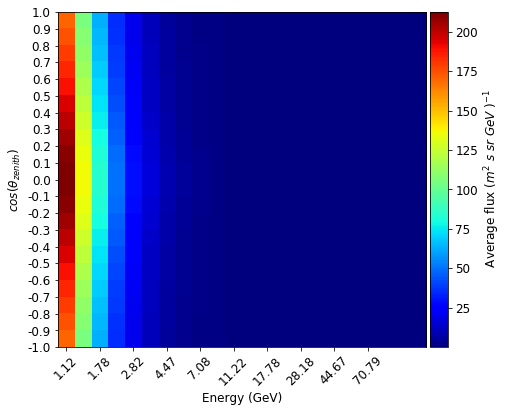

In [29]:

fig, ax = plt.subplots(figsize=(7,7))

im = ax.imshow(flux_spline_cropped_new, cmap='jet') 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks_cropped)
ax.set_xticklabels(xlabels_cropped, rotation=45)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels);
cbar.set_label(r' Average flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)

In [30]:
# for a fixed theta, interpolate the fluxes as a function of energy (with PCHIP-method)
from scipy import interpolate

x_interp = np.linspace(energy_min[0], energy_max[-1], 10000)
y_interp90 = interpolate.pchip_interpolate(energy_spline, flux_spline_cropped_new[10,:], x_interp)

energy_bins_spline = np.digitize(x_interp, energy_min)
energy_bin_center = (energy_max + energy_min) / 2

In [31]:
# Integration (average)
avg = np.zeros(len(energy_min))

for i in range(1, len(energy_min)+1):
    x_integrate = x_interp[energy_bins_spline == i]
    y_integrate = y_interp90[energy_bins_spline == i]
    integral = np.trapz(y_integrate, x=x_integrate, dx=0.001, axis=-1)
    avg[i-1] = integral / energy_binwidths[i-1]

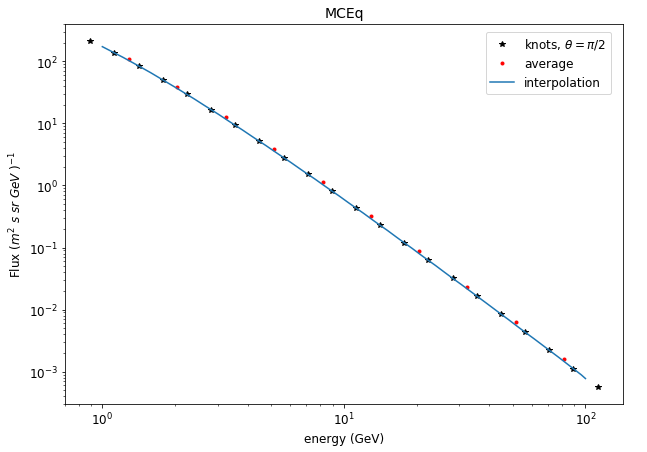

In [32]:
fig, ax = plt.subplots(figsize=(10,7))

ax.set_xlabel('energy (GeV)')
ax.set_ylabel(r'Flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$')
ax.loglog(energy_spline, flux_spline_cropped_new[10,:], 'k*', label = r'knots, $\theta=\pi/2$')
ax.loglog(energy_bin_center, avg, 'r.', label='average')
ax.loglog(x_interp, y_interp90, label = 'interpolation')
fig.legend(fontsize=12, loc=(0.75,0.79))
ax.set_title('MCEq', fontsize=14);
#fig.savefig('MCEq_spline90')

In [33]:
# Do it for all thetas and save the averages

MCEq_binned_splines = np.zeros((20, 10))

for theta in range(20):
    y_interp = interpolate.pchip_interpolate(energy_spline, flux_spline_cropped_new[theta], x_interp)
    avg = np.zeros(len(energy_min))

    for i in range(1, len(energy_min)+1):
        x_integrate = x_interp[energy_bins_spline == i]
        y_integrate = y_interp[energy_bins_spline == i]
        integral = np.trapz(y_integrate, x=x_integrate, dx=0.001, axis=- 1)
        avg[i-1] = integral / energy_binwidths[i-1]

    MCEq_binned_splines[theta] = avg


Text(0.5, 1.0, 'MCEq')

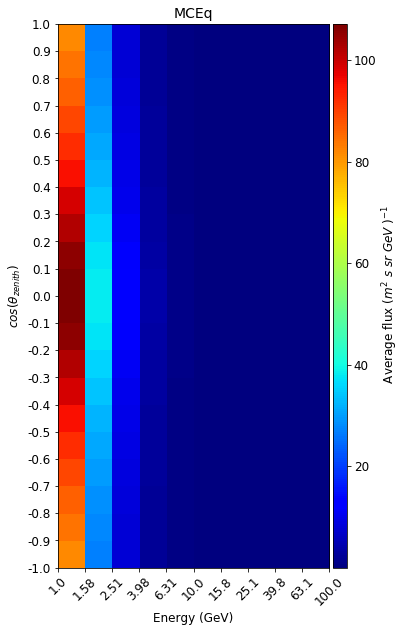

In [34]:
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(MCEq_binned_splines, cmap='jet') 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks)
ax.set_xticklabels(energy_strings, rotation=45)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels);
cbar.set_label(r' Average flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
ax.set_title('MCEq')
#fig.savefig('MCEq_binned_flux_spline');

In [35]:
np.savetxt('MCEq_binned_splines', MCEq_binned_splines, delimiter=',')

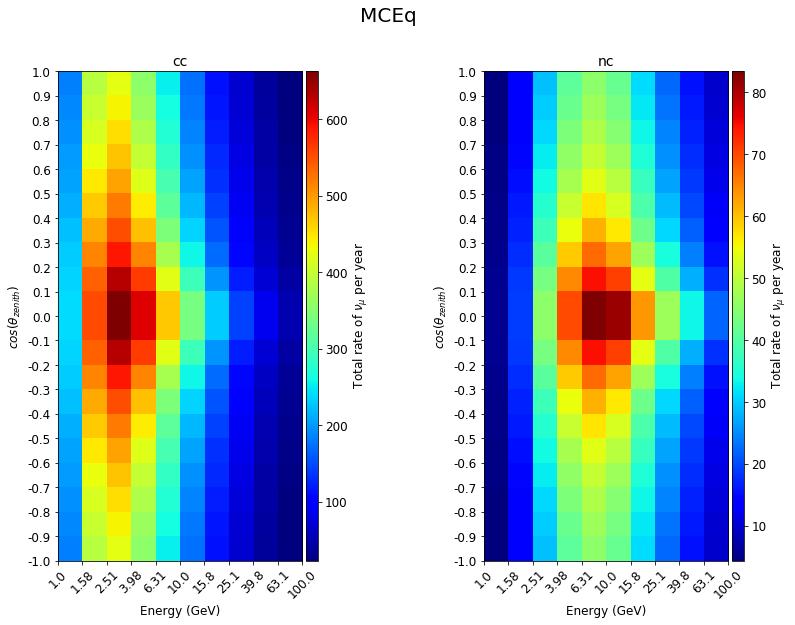

In [36]:
rate_spline_cc, rate_spline_nc = rate_plot(MCEq_binned_splines, title='MCEq') #, savefig='MCEq_rate_spline');

### Multiply by oscillation probability

In [37]:
prob_numu_to_numu = np.genfromtxt('prob_numu_to_numu', delimiter = ',')

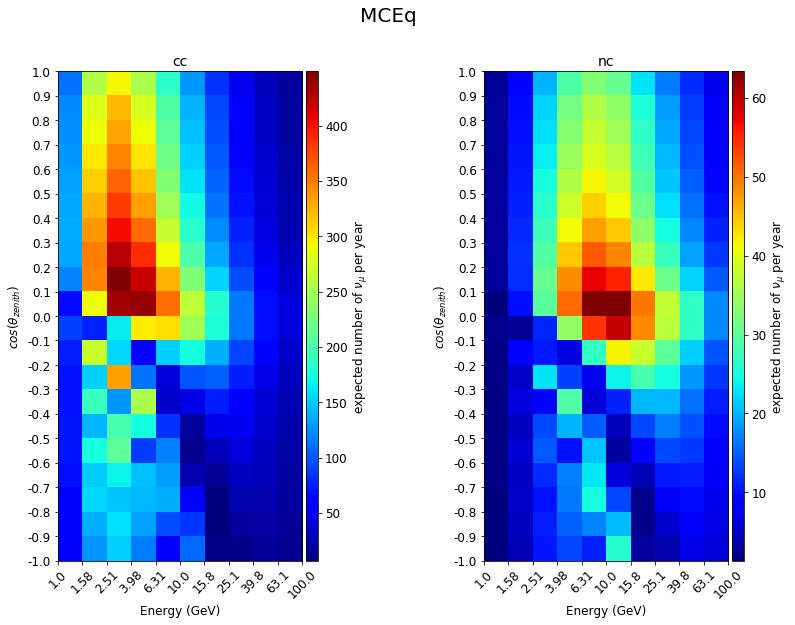

In [38]:
expected_numu_cc = prob_numu_to_numu * rate_spline_cc
expected_numu_nc = prob_numu_to_numu * rate_spline_nc

fig, ax = plt.subplots(1, 2, figsize=(14, 9))
ax.ravel()

im_0 = ax[0].imshow(expected_numu_cc, cmap='jet') 
im_1 = ax[1].imshow(expected_numu_nc, cmap='jet') 

for i in range(2):
    ax[i].set_xlabel('Energy (GeV)', fontsize = 12)
    ax[i].set_ylabel(r'$cos(\theta_{zenith})$', fontsize = 12)
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(energy_strings, rotation = 45)
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(ylabels)

cbar_label = r'expected number of $\nu_{\mu}$ per year'
divider_0 = make_axes_locatable(ax[0])
divider_1 = make_axes_locatable(ax[1])
cax_0 = divider_0.append_axes("right", size="5%", pad=0.05)
cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
cbar_0 = plt.colorbar(im_0, cax=cax_0)
cbar_1 = plt.colorbar(im_1, cax=cax_1)
cbar_0.set_label(cbar_label, fontsize = 12) 
cbar_1.set_label(cbar_label, fontsize = 12) 

ax[0].set_title('cc')
ax[1].set_title('nc')
plt.suptitle('MCEq', fontsize=20);
#fig.savefig('MCEq_rate_oscillated')

### $\chi^2$

In [39]:
chi2_cc = np.sum(((rate_year_cc - expected_numu_cc)**2 / (rate_year_cc + expected_numu_cc)))
chi2_nc = np.sum(((rate_year_nc - expected_numu_nc)**2 / (rate_year_nc + expected_numu_nc)))
print(chi2_cc, chi2_nc)

10802.847063486292 1253.3366491971956


In [40]:
# Applying statistical fluctuations to the oscillated rate (pseudo-trials)
# # events +/- sqrt(# events)
r = np.random

N_runs = 1000
chi2_cc_array = np.zeros(N_runs)
chi2_nc_array = np.zeros(N_runs)

for n in range(N_runs):
    rate_fluctuation_cc = expected_numu_cc.copy()
    rate_fluctuation_nc = expected_numu_nc.copy()

    rate_fluctuation_cc += r.poisson(rate_fluctuation_cc)
    rate_fluctuation_nc += r.poisson(rate_fluctuation_nc)
    #rate_fluctuation_cc += r.normal(rate_fluctuation_cc, np.sqrt(rate_fluctuation_cc))
    #rate_fluctuation_nc += r.normal(rate_fluctuation_nc, np.sqrt(rate_fluctuation_nc))
    
    chi2_cc_fluctuation = np.sum(((rate_year_cc - rate_fluctuation_cc)**2 / (rate_year_cc + rate_fluctuation_cc)))
    chi2_nc_fluctuation = np.sum(((rate_year_nc - rate_fluctuation_nc)**2 / (rate_year_nc + rate_fluctuation_nc)))
    chi2_cc_array[n] = chi2_cc_fluctuation
    chi2_nc_array[n] = chi2_nc_fluctuation

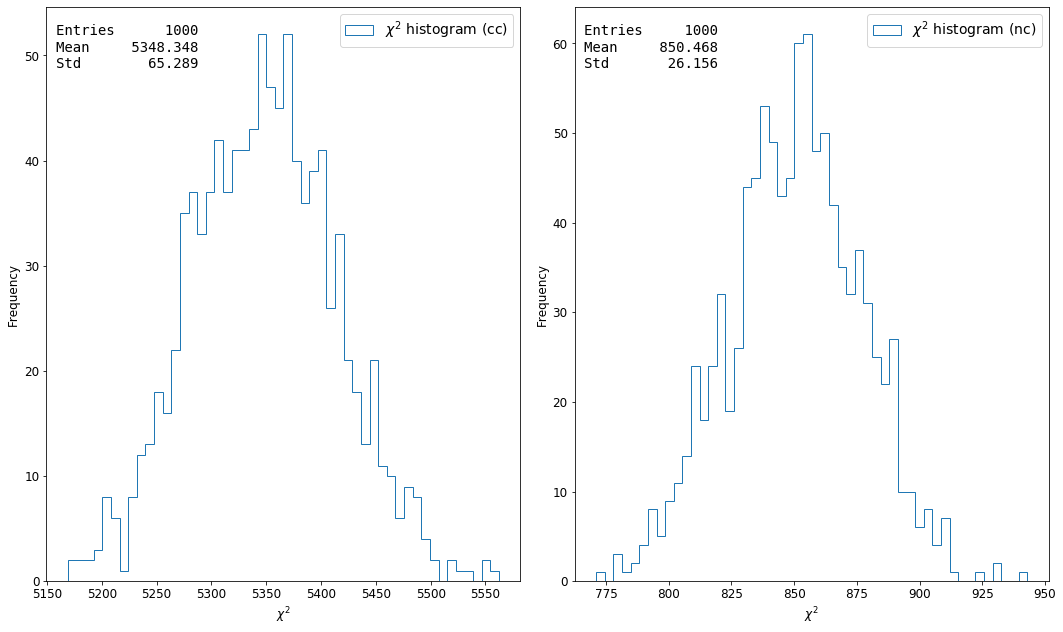

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15, 9))
ax.ravel()
ax[0].hist(chi2_cc_array, bins = 50, histtype = 'step', label = r'$\chi^2$ histogram (cc)')
ax[1].hist(chi2_nc_array, bins = 50, histtype = 'step', label = r'$\chi^2$ histogram (nc)')
ax[0].set(xlabel=r"$\chi^2$", ylabel="Frequency")
ax[1].set(xlabel=r"$\chi^2$", ylabel="Frequency")
# Define the figure text
d0 = {'Entries': N_runs,
      'Mean': chi2_cc_array.mean(),
      'Std': chi2_cc_array.std(),
    }
d1 = {'Entries': N_runs,
      'Mean': chi2_nc_array.mean(),
      'Std': chi2_nc_array.std(),
    }

# Add figure text
text0 = ef.nice_string_output(d0, extra_spacing=2, decimals=3)
text1 = ef.nice_string_output(d1, extra_spacing=2, decimals=3)
ef.add_text_to_ax(0.02, 0.97, text0, ax[0], fontsize=14)
ef.add_text_to_ax(0.02, 0.97, text1, ax[1], fontsize=14)

# Add legend
ax[0].legend(loc='best', fontsize=14)
ax[1].legend(loc='best', fontsize=14)
fig.tight_layout()
#fig.savefig('chi_squared_numu')

### Change of primary model

In [ ]:
# Hadronic interaction models
# SIBYLL23c
# SIBYLL23
# SIBYLL21
# EPOS-LHC
# QGSJet-II-04
# QGSJet-II-03
# QGSJet-01c
# DPMJET-III-3.0.6
# DPMJET-III-19.1
# SIBYLL-2.3c_pp (for proton-proton collisions)

# Cosmic ray fluxes: https://crfluxmodels.readthedocs.io/en/latest/
#pmodels = [
#    (crf.GaisserStanevTilav, "3-gen", "GST 3-gen", "b", "--"),
#    (crf.GaisserStanevTilav, "4-gen", "GST 4-gen", "b", "-"),
#    (crf.CombinedGHandHG, "H3a", "cH3a", "g", "--"),
#    (crf.CombinedGHandHG, "H4a", "cH4a", "g", "-"),
#    (crf.HillasGaisser2012, "H3a", "H3a", "r", "--"),
#    (crf.HillasGaisser2012, "H4a", "H4a", "r", "-"),
#    (crf.PolyGonato, False, "poly-gonato", "m", "-"),
#    (crf.Thunman, None, "TIG", "y", "-"),
#    (crf.ZatsepinSokolskaya, 'default', 'ZS', "c", "-"),
#    (crf.ZatsepinSokolskaya, 'pamela', 'ZSP', "c", "--"),
#    (crf.GaisserHonda, None, 'GH', "0.5", "-"),
    #    (GlobalSplineFit, None, 'GSF', "k", "-"),
#    (crf.GlobalSplineFitBeta, None, 'GSF spl', "k", ":")
#]

In [75]:
flux_GSF = np.zeros((n_theta,121))

for t in range(len(theta_matrix)):
    print(t)
    numu_flux, x_matrix = flux(theta_matrix[t], primary_model = (crf.GlobalSplineFitBeta, None), numu_only = True)
    flux_GSF[t] = numu_flux * 10000

0
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): GlobalSplineFitBeta 
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): GlobalSplineFitBeta 
1
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): GlobalSplineFitBeta 
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): GlobalSplineFitBeta 
2
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): 

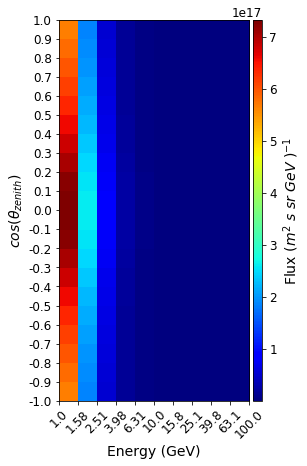

In [312]:
binned_flux_GSF, divide_GSF = bin_matrix(flux_GSF, make_flux_plot = True)
#fig.savefig('MCEq_1d_flux_mag0_divided')

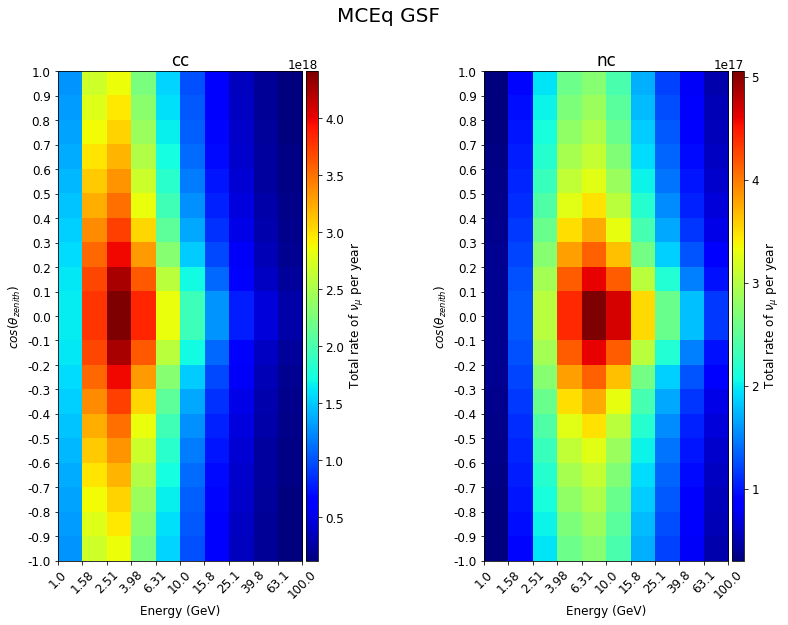

In [318]:
rate_year_cc_GSF, rate_year_nc_GSF = rate_plot(binned_flux_GSF, divided = divide_GSF,  
                                               title = 'MCEq GSF') #, savefig = 'GSF_total_rate')

### Change of interaction model

In [129]:
flux_EPOSLHC = np.zeros((n_theta,121))

for t in range(len(theta_matrix)):
    print(t)
    numu_flux, x_matrix = flux(theta_matrix[t], int_model = 'EPOS-LHC', numu_only = True)
    flux_EPOSLHC[t] = numu_flux * 10000

0
MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): EPOSLHC
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
1
MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): EPOSLHC
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
2
MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Hillas

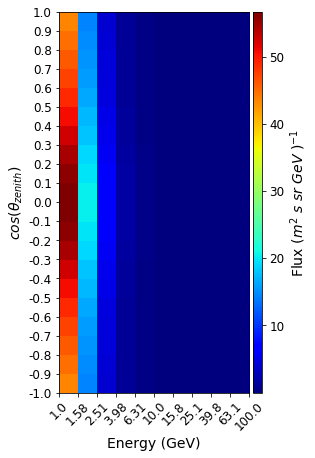

In [315]:
binned_flux_EPOSLHC, divide_EPOSLHC = bin_matrix(flux_EPOSLHC, make_flux_plot = True) #savefig = 

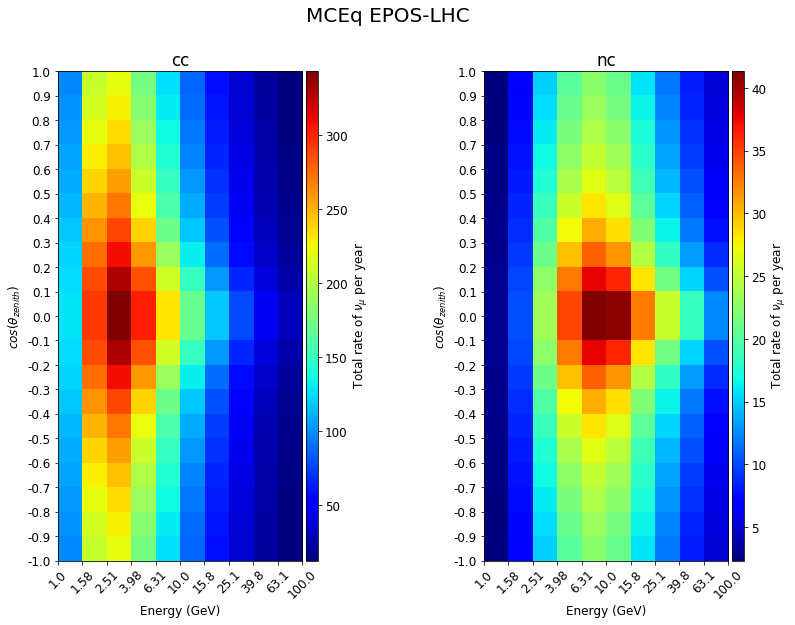

In [317]:
rate_year_cc_EPOSLHC, rate_year_nc_EPOSLHC = rate_plot(binned_flux_EPOSLHC, divided = divide_EPOSLHC, 
                                                       title = 'MCEq EPOS-LHC') #, savefig = 'EPOS-LHC_total_rate')